In [9]:
# !pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=710a330698c1f50c957871da84583bec981c0b8eb4dee4310b75881ccfd19ed5
  Stored in directory: c:\users\bitcamp\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [1]:
import os
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

mobilenet = MobileNet(include_top=True, weights = 'imagenet',
                     input_tensor=None, input_shape=None,
                     pooling=None, classes=1000)
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

[[('n04591713', 'wine_bottle', 0.7600233), ('n04579145', 'whiskey_jug', 0.044962622), ('n04522168', 'vase', 0.03465398), ('n07892512', 'red_wine', 0.032706358), ('n04560804', 'water_jug', 0.028370555)]]


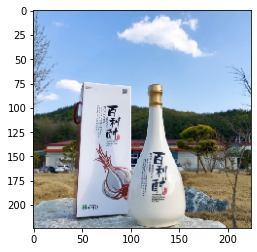

In [17]:
img = image.load_img('../data/drinks/백이주/백이주13.jpg', target_size =(224,224))
plt.imshow(img)
x = image.img_to_array(img)
x = x.reshape((1,x.shape[0], x.shape[1],x.shape[2]))
x = preprocess_input(x)

preds = mobilenet.predict(x)
print(decode_predictions(preds))